# Logistic Regression - Example


Scikit-learn is a free machine learning library for python. We can easily implement logistic regression with [Scikit-learn](https://www.google.com/search?q=scikit+learn&rlz=1C5CHFA_enES992ES992&oq=scikit+learn&gs_lcrp=EgZjaHJvbWUyDggAEEUYJxg5GIAEGIoFMgwIARAjGCcYgAQYigUyBwgCEAAYgAQyBwgDEAAYgAQyBwgEEAAYgAQyBwgFEAAYgAQyBggGEEUYPDIGCAcQRRg90gEIMjMxMWowajeoAgCwAgA&sourceid=chrome&ie=UTF-8) using the LogisticRegression class. 

After creating a logistic regression object, we can obtain the line that best fits our data by calling the fit method. You can learn more about it [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

So let's see how this works!

In [19]:
# First things first, we always need to import the libraries. 
from sklearn import datasets
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0
...,...,...,...,...,...,...
269,Gentoo,Biscoe,47.2,13.7,214.0,4925.0
270,Gentoo,Biscoe,46.8,14.3,215.0,4850.0
271,Gentoo,Biscoe,50.4,15.7,222.0,5750.0
272,Gentoo,Biscoe,45.2,14.8,212.0,5200.0


# PENGUINS CLASSIFICATION - GENTOO OR ADELIE?

## 1. Getting the data
Today we are dealing with some real-world data to apply our brand new logistic regression model. And the first example we will see together is how to classify penguins species.
We are using a Kaggle [Penguins dataset](https://www.kaggle.com/datasets/martaarroyo/palmer-penguins-for-binary-classification).

In [34]:
# Load Penguins dataset. 
df = pd.read_csv("Files/Logistic_regression/penguins_binary_classification.csv")
df = df.drop(columns="year")
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0
...,...,...,...,...,...,...
269,Gentoo,Biscoe,47.2,13.7,214.0,4925.0
270,Gentoo,Biscoe,46.8,14.3,215.0,4850.0
271,Gentoo,Biscoe,50.4,15.7,222.0,5750.0
272,Gentoo,Biscoe,45.2,14.8,212.0,5200.0


## 2. Some first analysis
Some first analysis to further get the idea of what data we have in out table. 

In [35]:
# Checking our dataset
df.describe() #describes are data 

df.info() #gives information about the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            274 non-null    object 
 1   island             274 non-null    object 
 2   bill_length_mm     274 non-null    float64
 3   bill_depth_mm      274 non-null    float64
 4   flipper_length_mm  274 non-null    float64
 5   body_mass_g        274 non-null    float64
dtypes: float64(4), object(2)
memory usage: 13.0+ KB


species
Adelie    151
Gentoo    123
Name: count, dtype: int64


/var/folders/5h/h364vcws335c872gj8pv3jvm0000gn/T/ipykernel_4990/3618207599.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df["species"], palette=["purple", "orange"])


<Axes: xlabel='count', ylabel='species'>

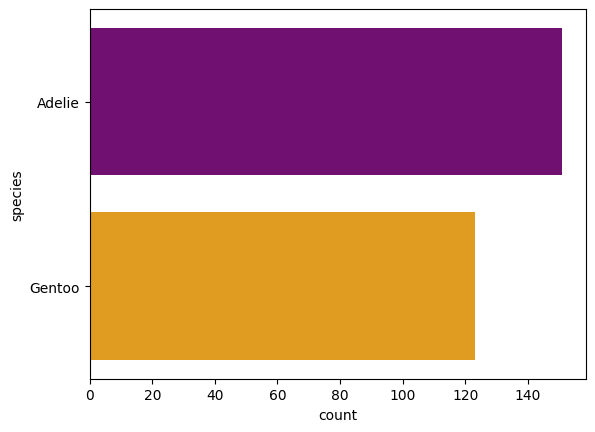

In [33]:
#We can check the distribution of individuals we have for each specie. Remember that strongly imabalanced datasets can be a problem. 
print(df["species"].value_counts())
sns.countplot(df["species"], palette=["purple", "orange"])

## 3. Understanding our data

### HEATMAP 
To understand what variables have a strong impact in our penguin species, we can use different commands. 
The first one is a Heat Map, that visually represents the correlation between all pairs of numeric columns within our DataFrame. 
The correlation range to 1 to -1 and indicates the strength and direction of their relationship. 

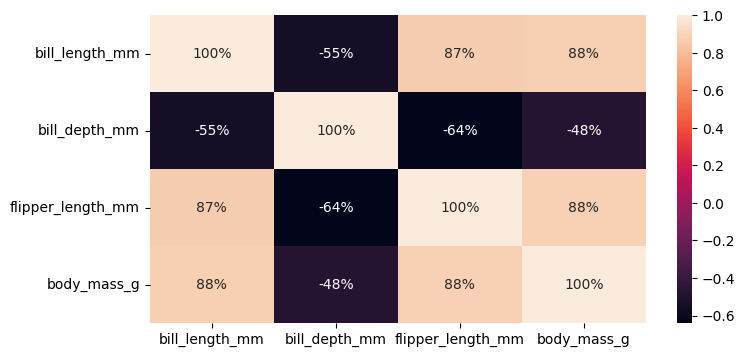

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(8, 4))

import seaborn as sns
sns.heatmap(numeric_df.corr(), annot=True, fmt=".0%")
plt.show()


### PAIR PLOT

It generates a grid of scatter plots, each showing the relationship between two different variables in the dataset and with colors based on species.
This provides an overview of how different variables interact and how these interactions vary by species.

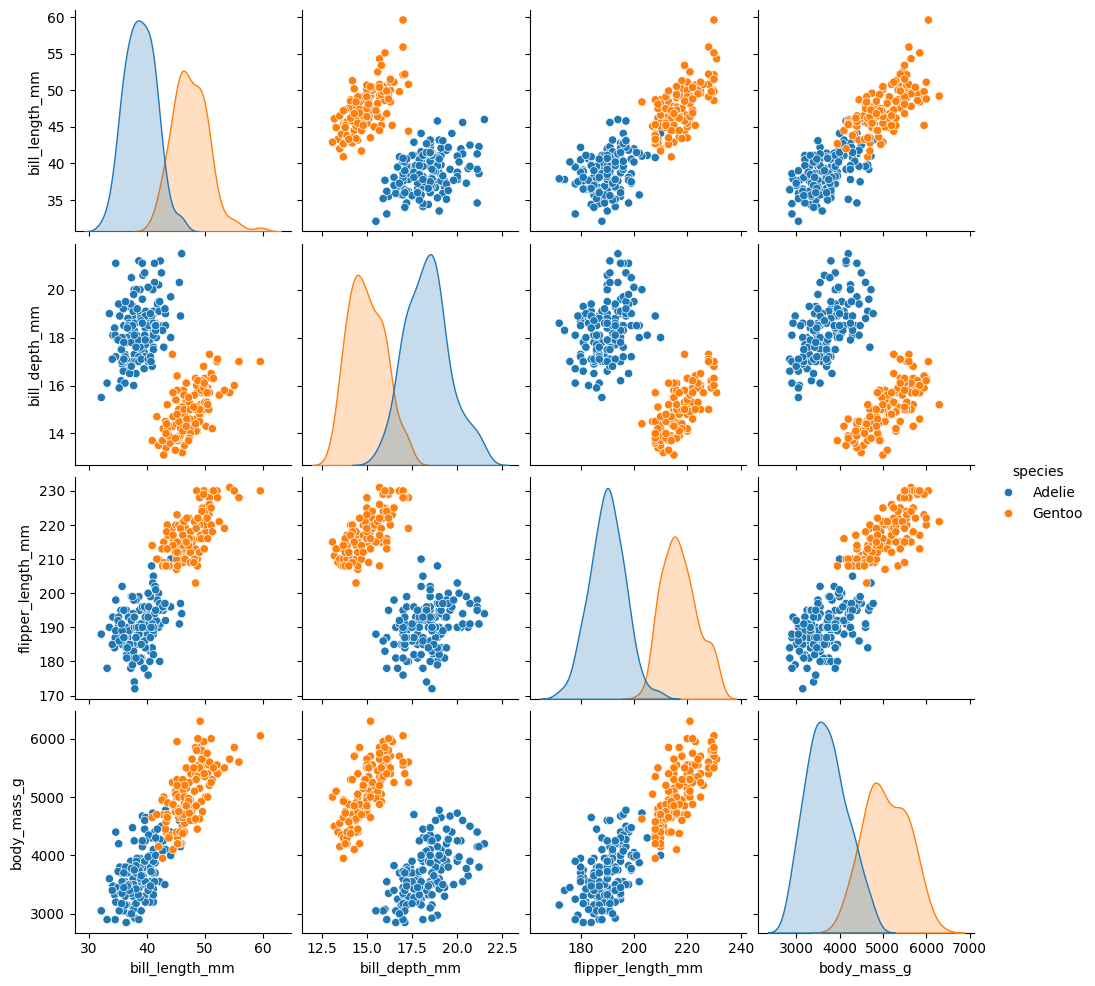

In [30]:
#let Create a pair plot of some columns 
df_temp = df.drop(columns=["bill_length_mm", "body_mass_g"])
sns.pairplot(df.iloc[:,:],hue='species')  # graph also  tell us about the the realationship between the two columns 

## 3. FIRST CLASSIFICATION - 1 variable to 2 classes.

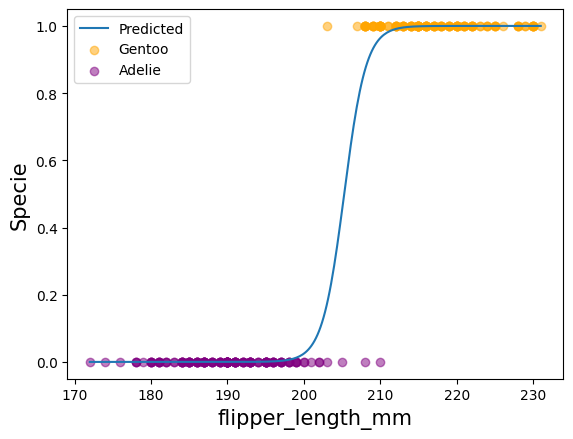

In [36]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# One-hot encode the categorical data and sort by flipper_length_mm
df_dummy = pd.get_dummies(df, dtype=int).sort_values(by='flipper_length_mm', ascending=True)

# Select the features and the target variable
X = df_dummy[['flipper_length_mm']]
Y = df_dummy["species_Gentoo"]

# Fit the Logistic Regression model
log = LogisticRegression()
log.fit(X, Y)

# Define the sigmoid function
def sigmoid(x, A, B):
    return 1 / (1 + np.exp(-A*x - B))

# Apply the sigmoid function using the coefficients
# The .ravel() is used to convert the 2D array of coefficients to a 1D array for compatibility.
w = log.coef_.ravel()[0] # Assuming it's the first feature's coefficient we're interested in
b = log.intercept_[0]

# Create a range of values for X to plot the sigmoid function smoothly
X_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
Y_predicted = sigmoid(X_range, w, b)

# Plot the predicted probabilities
plt.plot(X_range, Y_predicted, label='Predicted')

X_gentoo = df_dummy[df_dummy["species_Gentoo"]==1]['flipper_length_mm'].values
X_not_gentoo = df_dummy[df_dummy["species_Gentoo"]==0]['flipper_length_mm'].values

# Plot the actual values colored by class
plt.scatter(X_gentoo, Y[Y == 1], label='Gentoo', color='orange', alpha=0.5)
plt.scatter(X_not_gentoo, Y[Y == 0], label='Adelie', color='purple', alpha=0.5)
plt.xlabel("flipper_length_mm",fontsize=15)
plt.ylabel("Specie",fontsize=15)

# Show the plot with legends
plt.legend()
plt.show()


## 3. SECOND CLASSIFICATION - 2 variables to 2 classes.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


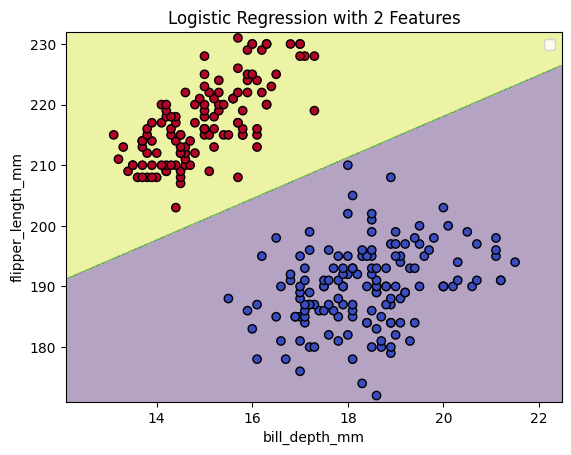

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Assuming df_1_2 is a preloaded DataFrame with the necessary data
# and 'PetalWidthCm' and 'PetalLengthCm' are the two features used for classification

# Prepare the data
df_dummy = pd.get_dummies(df, dtype=int).sort_values(by='flipper_length_mm', ascending=True)

# Select the features and the target
X = df_dummy.iloc[:, 1:3]  # Assuming that the features are in the 3rd and 4th columns
Y = df_dummy["species_Gentoo"]

# Fit the Logistic Regression model
log = LogisticRegression()
log.fit(X.values, Y)

# Create a mesh to plot the decision boundary
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = log.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.4)

# Plot the scatter plot
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y, edgecolors='k', cmap=plt.cm.coolwarm)
plt.xlabel('bill_depth_mm')
plt.ylabel('flipper_length_mm')
plt.title('Logistic Regression with 2 Features')
plt.legend()

# Show the plot
plt.show()


In [10]:
X

,bill_depth_mm,flipper_length_mm
27,18.6,172.0
19,18.3,174.0
121,17.0,176.0
30,18.1,178.0
29,16.7,178.0
...,...,...
216,16.8,230.0
184,17.0,230.0
226,16.0,230.0
264,16.3,230.0


# Sci-kit Learn

In [11]:
X

,bill_depth_mm,flipper_length_mm
27,18.6,172.0
19,18.3,174.0
121,17.0,176.0
30,18.1,178.0
29,16.7,178.0
...,...,...
216,16.8,230.0
184,17.0,230.0
226,16.0,230.0
264,16.3,230.0


**Steps To Be followed When Applying an Algorithm**

1. Split the dataset into training and testing dataset. The testing dataset is generally smaller than training one as it will help in training the model better.
2. Select any algorithm based on the problem (classification or regression) whatever you feel may be good.
3. Then pass the training dataset to the algorithm to train it. We use the .fit() method
4. Then pass the testing data to the trained algorithm to predict the outcome. We use the .predict() method.
5. We then check the accuracy by passing the predicted outcome and the actual output to the model.

In [12]:
# importing alll the necessary packages to Logistic Regression 
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn import metrics #for checking the model accuracy

In [13]:
X=df.iloc[:,3:4]
Y=df["Species"]
X.head()

KeyError: 'Species'

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print("Train Shape",X_train.shape)
print("Test Shape",X_test.shape)

Train Shape (112, 1)
Test Shape (38, 1)


In [ ]:
log = LogisticRegression()
log.fit(X_train,Y_train)
prediction=log.predict(X_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,Y_test))

The accuracy of the Logistic Regression is 0.9736842105263158


Splitting The Data into Training And Testing Dataset

In [ ]:
X=df.iloc[:,0:4]
Y=df["Species"]
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print("Train Shape",X_train.shape)
print("Test Shape",X_test.shape)

Train Shape (112, 4)
Test Shape (38, 4)


# Logistic Regression

In [ ]:
log = LogisticRegression()
log.fit(X_train,Y_train)
prediction=log.predict(X_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,Y_test))

The accuracy of the Logistic Regression is 0.9736842105263158


In [ ]:

X = iris.data
y = iris.target

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Cost function
def compute_cost(X, y, weights):
    m = len(y)
    h = sigmoid(X @ weights)
    cost = -(1/m) * (y.T @ np.log(h) + (1 - y).T @ np.log(1 - h))
    return cost

# Gradient descent
def gradient_descent(X, y, weights, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        weights = weights - (learning_rate/m) * (X.T @ (sigmoid(X @ weights) - y))
        cost_history[i] = compute_cost(X, y, weights)

    return weights, cost_history

# Logistic Regression model
def logistic_regression(X, y, learning_rate=0.01, iterations=1000):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    weights = np.zeros(X.shape[1])
    weights, cost_history = gradient_descent(X, y, weights, learning_rate, iterations)
    return weights, cost_history


# Train the logistic regression model
weights, cost_history = logistic_regression(X, y)

# Making predictions
predictions = sigmoid(np.dot(np.hstack((np.ones((X.shape[0], 1)), X)), weights))
predictions


NameError: name 'iris' is not defined

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import datasets

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Convert to binary classification (Iris Setosa vs. Not Setosa)
y = np.where(y == 0, 0, 1)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Making predictions
predictions = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        25

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

